In [4]:
import matplotlib.pyplot as plt
import pandas as pd

nyc_map = plt.imread('img/nyc_map.png')
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
BB = (-74.5, -72.8, 40.5, 41.8)
BB_zoom = (-74.3, -73.7, 40.5, 40.9)

def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

df_before = pd.read_hdf('train_mod.h5', low_memory=False)
df_after = pd.read_hdf('data/train_mod.h5')

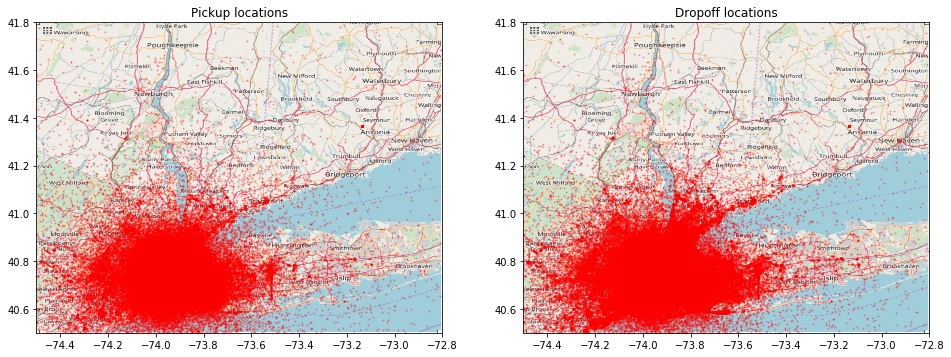

In [2]:
plot_on_map(df_before, BB, nyc_map, s=1, alpha=0.3)

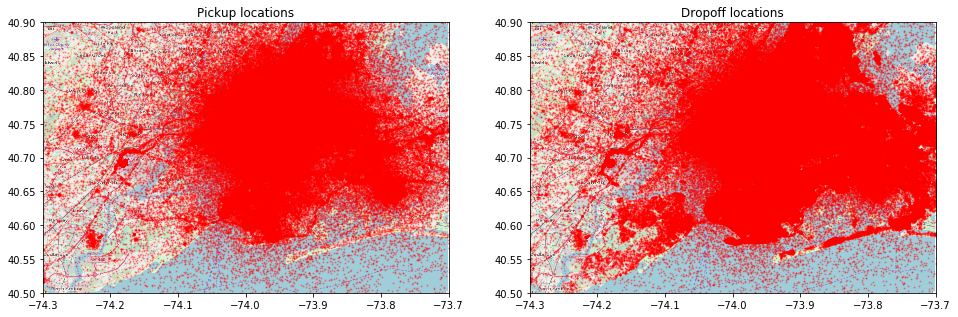

In [6]:
plot_on_map(df_before, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

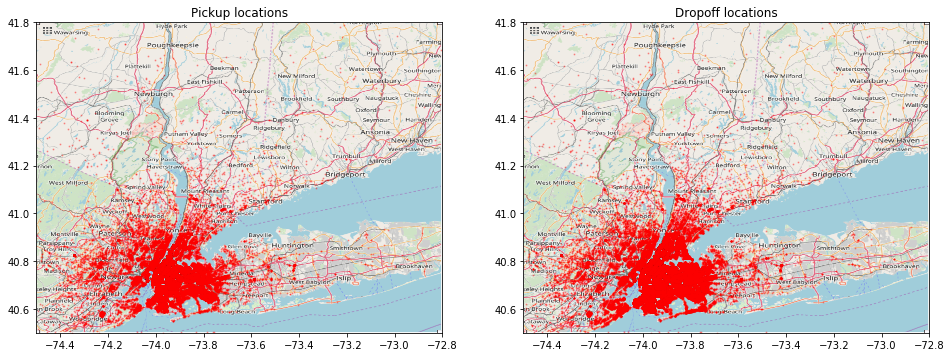

In [3]:
plot_on_map(df_after, BB, nyc_map, s=1, alpha=0.3)

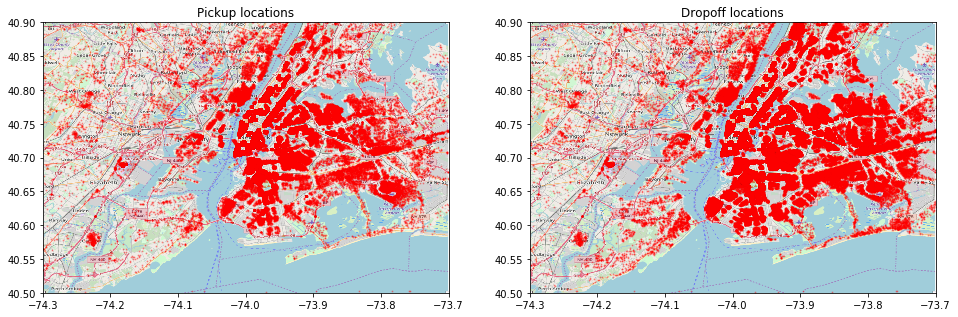

In [5]:
plot_on_map(df_after, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

In [7]:
df_after.head()


,level_0,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sin_time_of_day,cos_time_of_day,sin_day_of_week,cos_day_of_week,sin_month,cos_month,year
45,45,73,35.0,-73.981882,40.768257,-73.837582,40.785407,3,0.831470,0.555570,7.818315e-01,0.623490,8.660254e-01,0.500000,2014.0
72,72,100,5.7,-73.980498,40.730512,-73.987953,40.719130,1,-0.207912,-0.978148,-7.818315e-01,0.623490,1.224647e-16,-1.000000,2010.0
80,80,108,5.7,-73.980938,40.767823,-73.990040,40.775772,1,-0.713250,0.700909,-7.818315e-01,0.623490,-8.660254e-01,0.500000,2011.0
83,83,111,6.0,-73.997152,40.714787,-74.009180,40.704379,1,0.279829,-0.960050,-2.449294e-16,1.000000,-5.000000e-01,0.866025,2012.0
84,84,112,10.5,-73.794236,40.656233,-73.794236,40.656233,1,-0.342020,0.939693,-9.749279e-01,-0.222521,8.660254e-01,0.500000,2010.0


In [11]:
df_after.drop(columns = ['index'], inplace = True)
df_after.reset_index(inplace = True, drop = True)

In [12]:
df_after.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sin_time_of_day,cos_time_of_day,sin_day_of_week,cos_day_of_week,sin_month,cos_month,year
0,35.0,-73.981882,40.768257,-73.837582,40.785407,3,0.831470,0.555570,7.818315e-01,0.623490,8.660254e-01,0.500000,2014.0
1,5.7,-73.980498,40.730512,-73.987953,40.719130,1,-0.207912,-0.978148,-7.818315e-01,0.623490,1.224647e-16,-1.000000,2010.0
2,5.7,-73.980938,40.767823,-73.990040,40.775772,1,-0.713250,0.700909,-7.818315e-01,0.623490,-8.660254e-01,0.500000,2011.0
3,6.0,-73.997152,40.714787,-74.009180,40.704379,1,0.279829,-0.960050,-2.449294e-16,1.000000,-5.000000e-01,0.866025,2012.0
4,10.5,-73.794236,40.656233,-73.794236,40.656233,1,-0.342020,0.939693,-9.749279e-01,-0.222521,8.660254e-01,0.500000,2010.0


In [14]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_after)
scaled_df = pd.DataFrame(scaled_df, columns=['year', 'passenger_count'])
scaled_df.head()

ValueError: Shape of passed values is (3967678, 13), indices imply (3967678, 2)